<a href="https://colab.research.google.com/github/ThuanPhong0126/CS114.K21/blob/master/%C4%90PT/MLipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse

/content/drive/My Drive/Colab Notebooks/ML/ImageClassification/UCMerced_LandUse


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from numpy import expand_dims
import glob
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
features, label=[], []

In [ ]:
trans_label={'freeway': 0, 'intersection': 1, 'overpass': 2, 'parkinglot': 3}

In [ ]:
datagen=ImageDataGenerator(
                           rotation_range=20,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                            )

In [ ]:
image=cv2.imread('Images/images/intersection/intersection24.tif')

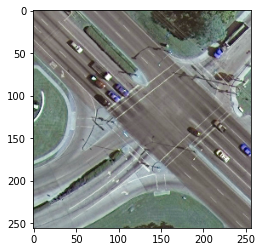

In [ ]:
plt.imshow(image)

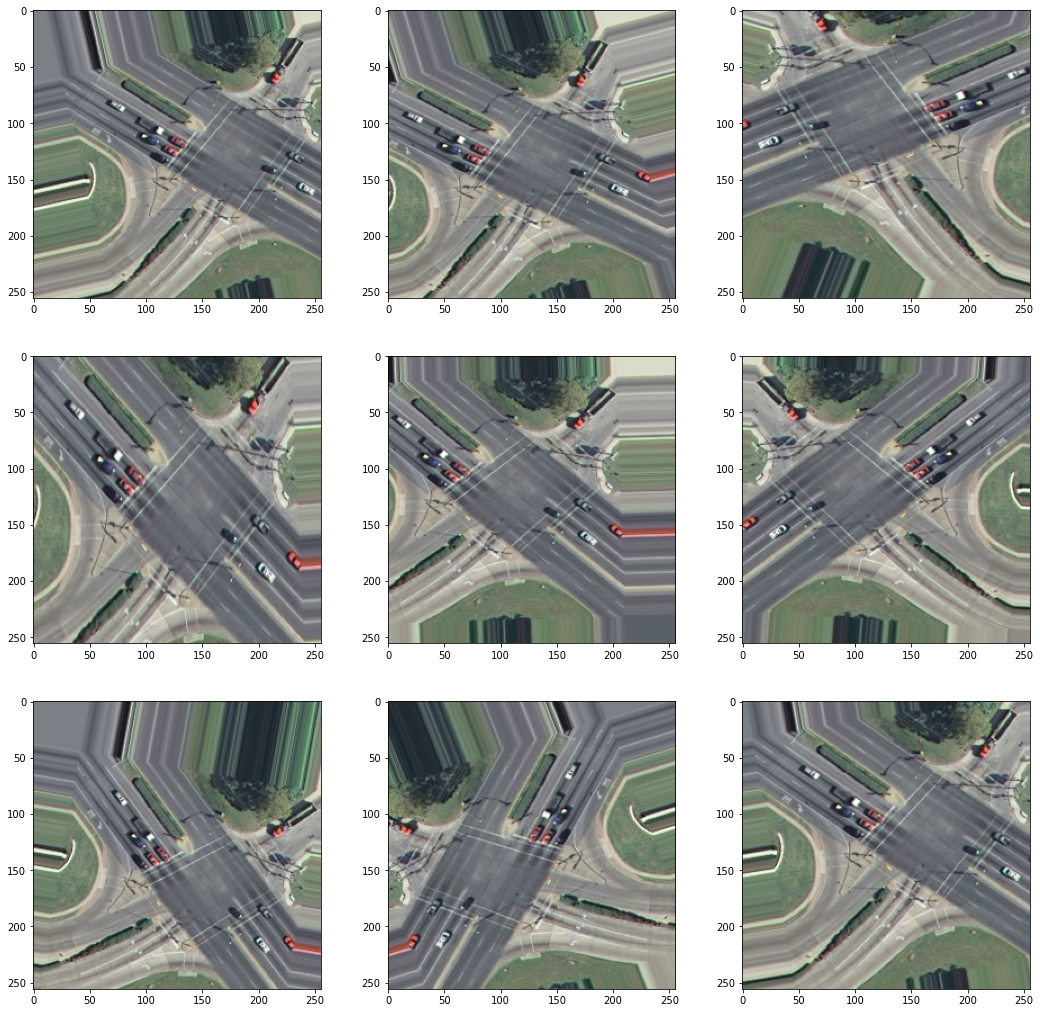

In [ ]:
img = load_img('Images/images/intersection/intersection24.tif')
data = img_to_array(img)
samples = expand_dims(data, 0)
it = datagen.flow(samples, batch_size=1)
plt.figure(figsize=(18,18))
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

In [ ]:
datagen=ImageDataGenerator(rescale=1/255.0,
                           rotation_range=90,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True
                            )

In [2]:
image_data,label_vector=[],[]
for link in glob.glob('Images/images/*/*'):
  img=cv2.imread(link)
  img=cv2.resize(img,(224,224))
  img=np.reshape(img,224*224*3)
  image_data.append(img)
  label_vector.append(trans_label[link.split('/')[-2]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(image_data,label_vector,test_size=0.2,random_state=42)

In [ ]:
model1=SVC()
model1.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predict1=model1.predict(X_test)

In [ ]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       0.38      0.48      0.42        23
           1       0.48      0.50      0.49        32
           2       0.71      0.63      0.67        35
           3       0.45      0.39      0.42        23

    accuracy                           0.51       113
   macro avg       0.51      0.50      0.50       113
weighted avg       0.53      0.51      0.52       113



In [ ]:
print(confusion_matrix(y_test,predict1))

[[11  8  3  1]
 [11 16  2  3]
 [ 4  2 22  7]
 [ 3  7  4  9]]


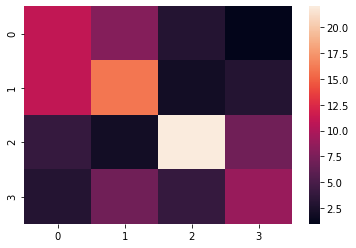

In [ ]:
sns.heatmap(confusion_matrix(y_test,predict1))

In [ ]:
model2=RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predict2=model2.predict(X_test)

In [ ]:
print(classification_report(y_test,predict2))

              precision    recall  f1-score   support

           0       0.38      0.57      0.46        23
           1       0.50      0.56      0.53        32
           2       0.68      0.66      0.67        35
           3       0.44      0.17      0.25        23

    accuracy                           0.51       113
   macro avg       0.50      0.49      0.48       113
weighted avg       0.52      0.51      0.50       113



In [ ]:
print(confusion_matrix(y_test,predict2))

[[13  7  2  1]
 [ 9 18  3  2]
 [ 6  4 23  2]
 [ 6  7  6  4]]


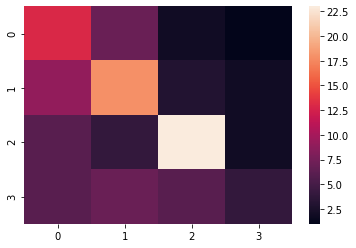

In [ ]:
sns.heatmap(confusion_matrix(y_test,predict2))

In [ ]:
import pickle

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
trans_label_=['freeway' ,'intersection', 'overpass', 'parkinglot']

intersection


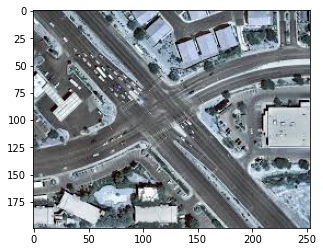

In [ ]:
img='intersection1.jpg'
img=cv2.imread(img)
plt.imshow(img)
img=cv2.resize(img,(128,128))
img=np.reshape(img,128*128*3)/255.0
predict=model1.predict([img])
print(trans_label_[predict[0]])

## Phần code này chỉ để vẽ ra cái biểu đồ

In [ ]:
import glob

In [ ]:
tk={'freeway':0,'intersection':0,'overpass':0,'parkinglot':0}
dem=0
for link in glob.glob('Images/images/*/*'):
  tk[link.split('/')[-2]]+=1
  dem+=1
print(f'Found {dem} images belonging to 4 classes.')
print(tk)
df=pd.DataFrame(tk,index=[0])
df=df.T
df=df.reset_index().rename({'index':'class',0:'sl'},axis=1)
df

Found 400 images belonging to 4 classes.
{'freeway': 100, 'intersection': 100, 'overpass': 100, 'parkinglot': 100}


,class,sl
0,freeway,100
1,intersection,100
2,overpass,100
3,parkinglot,100


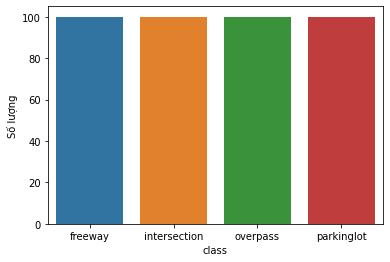

In [ ]:
sns.barplot(data=df,x='class',y='sl')
plt.ylabel('Số lượng')
plt.show()